**First Import Libraries **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns


Second Reading DataSet

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


by first look on data , i decide to drop 2 coloumns which are
( capital-gain	capital-loss )
Reason : 1) NON - understandable
         2) LOT of Zeros

In [4]:
df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


Lets Make Some Visualizations
, to look About Distributions Of Data

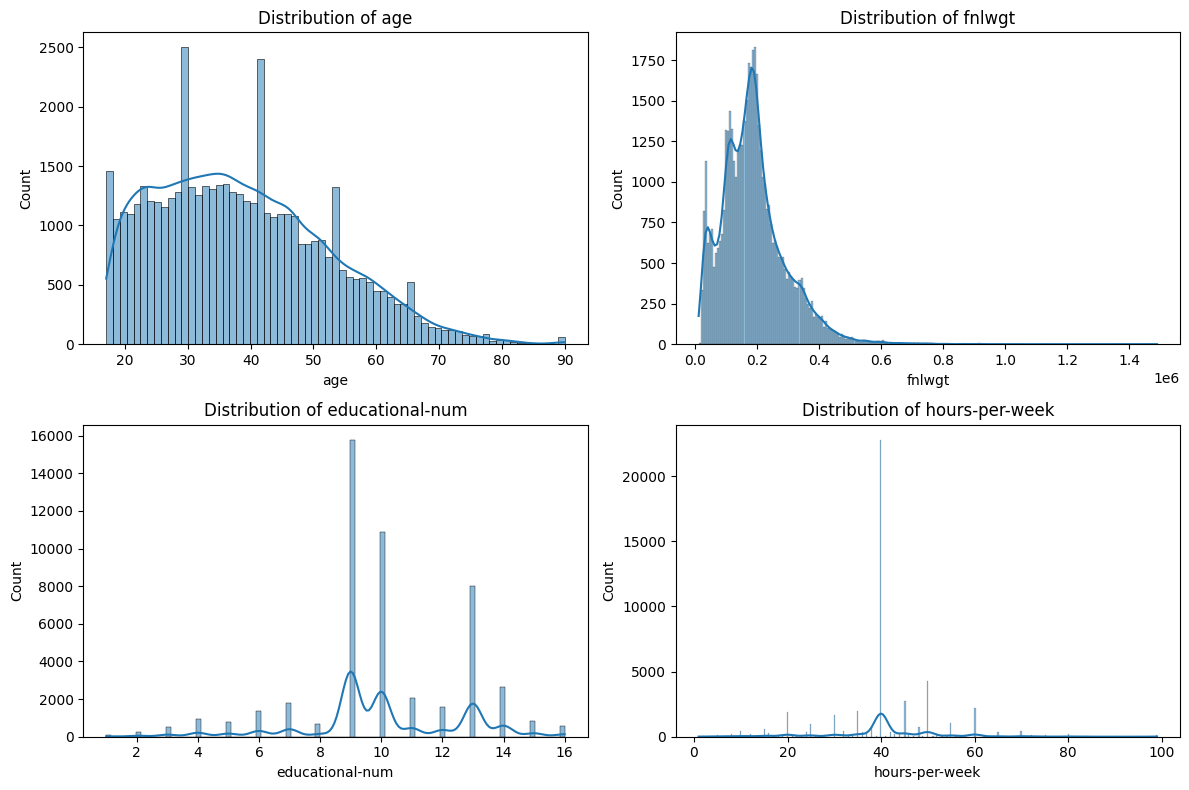

In [5]:
# 1. Visualize Distribution of Numerical Variables
numerical_columns = ['age', 'fnlwgt', 'educational-num', 'hours-per-week']

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Lets Visualize Categorical values
, For Unique Values

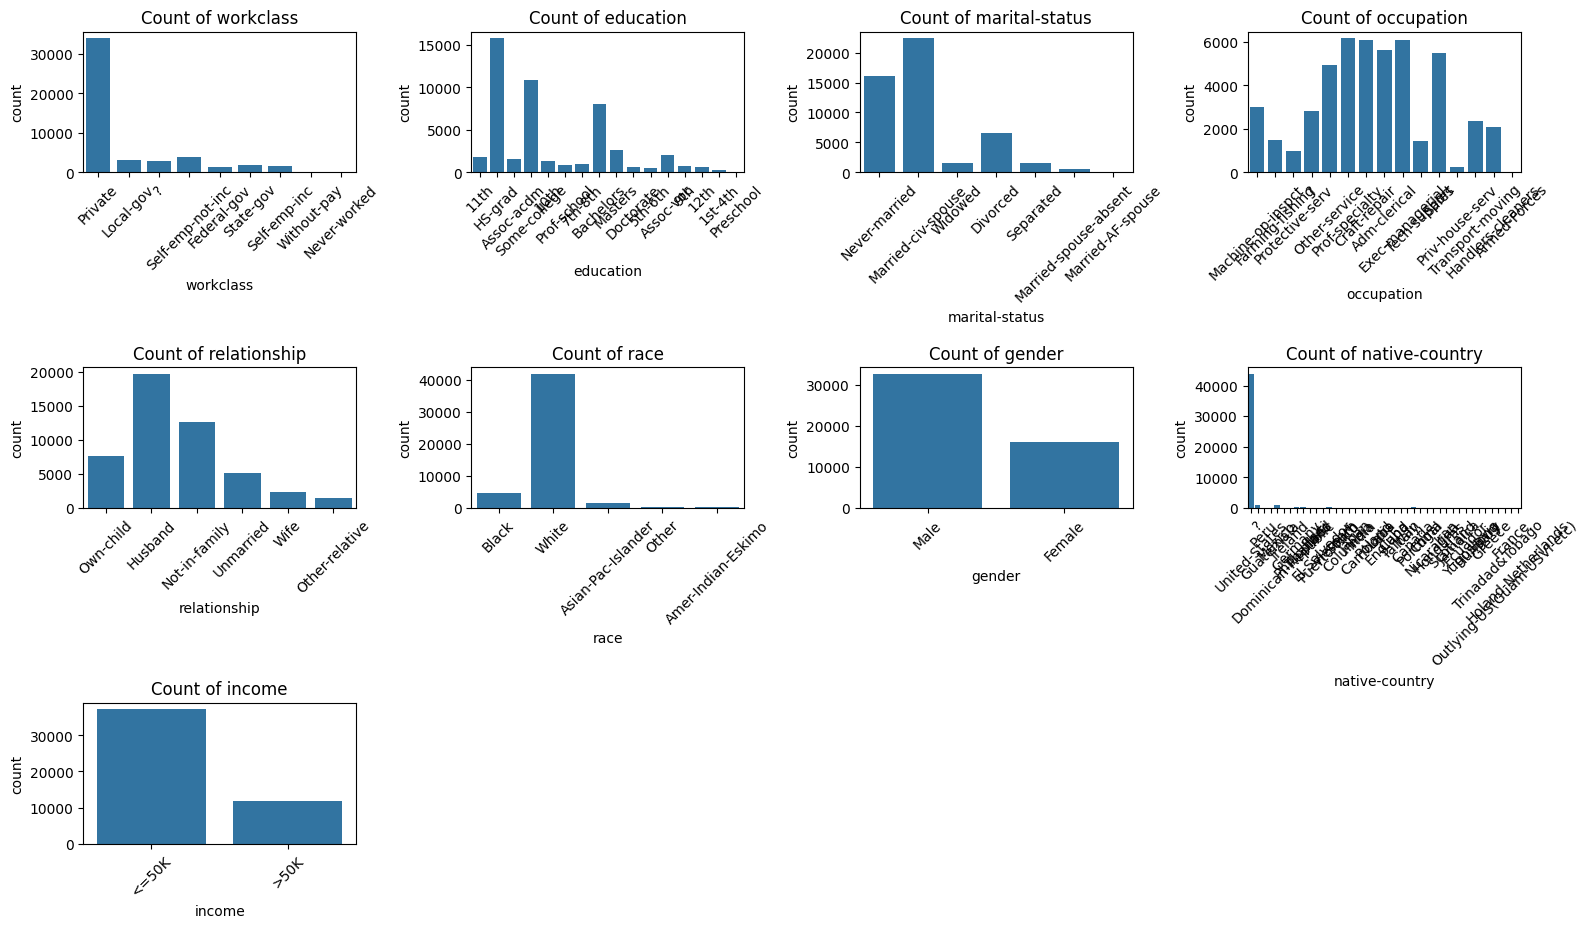

In [6]:
# 2. Visualize Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Lets check For Null Values

In [7]:
# 1. Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64


After deep look for Data i saw many values like this " ? "
, we need to replace it
, use mode for categorical values

In [8]:
# Replace "?" with NaN and then handle NaNs
df.replace('?', np.nan, inplace=True)
missing_values_after_replacement = df.isnull().sum()
print("Missing Values After Replacement:\n", missing_values_after_replacement)

Missing Values After Replacement:
 age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [9]:
# Impute missing values ( using mode for categorical data)
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("Data Shape After Imputing Missing Values:"), df.shape

Data Shape After Imputing Missing Values:


(None, (48842, 13))

Lets Check for Duplicated Values


In [10]:
df.duplicated().sum()

61

lets Drop Duplicated Rows

In [11]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Data Shape After Dropping Duplicates:", df.shape)

Data Shape After Dropping Duplicates: (48781, 13)


Lets Ientify OUTLIERS

In [12]:
# 3. Identify Outliers using IQR method
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Number of Outliers in {col}: {outliers.shape[0]}")

Number of Outliers in age: 215
Number of Outliers in fnlwgt: 1452
Number of Outliers in educational-num: 1787
Number of Outliers in hours-per-week: 13484


We need to Handle Outliers

Capping and flooring are techniques used to handle outliers in a dataset. These methods limit the extreme values to a specified threshold, thereby reducing the influence of outliers without completely removing them.

In [13]:
# 3. Handle Outliers using Capping/Flooring
def cap_floor_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where(series < lower_bound, lower_bound,
                    np.where(series > upper_bound, upper_bound, series))

numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    df[col] = cap_floor_outliers(df[col])

In [14]:
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Number of Outliers in {col}: {outliers.shape[0]}")

Number of Outliers in age: 0
Number of Outliers in fnlwgt: 0
Number of Outliers in educational-num: 0
Number of Outliers in hours-per-week: 0


NOW , Lets look For Unique Values

In [15]:
# 4. Unique Values
unique_values = {col: df[col].nunique() for col in df.columns}
print("Unique Values in Each Column:\n", unique_values)

Unique Values in Each Column:
 {'age': 62, 'workclass': 8, 'fnlwgt': 27373, 'education': 16, 'educational-num': 13, 'marital-status': 7, 'occupation': 14, 'relationship': 6, 'race': 5, 'gender': 2, 'hours-per-week': 22, 'native-country': 41, 'income': 2}


Lets Encode Categorical Values

In [16]:
# Label encode all categorical columns
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [17]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25.0,3,226802.0,1,7.0,4,6,3,2,1,40.0,38,0
1,38.0,3,89814.0,11,9.0,2,4,0,4,1,50.0,38,0
2,28.0,1,336951.0,7,12.0,2,10,0,4,1,40.0,38,1
3,44.0,3,160323.0,15,10.0,2,6,0,2,1,40.0,38,1
4,18.0,3,103497.0,15,10.0,4,9,3,4,0,32.5,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,3,257302.0,7,12.0,2,12,5,4,0,38.0,38,0
48838,40.0,3,154374.0,11,9.0,2,6,0,4,1,40.0,38,1
48839,58.0,3,151910.0,11,9.0,6,0,4,4,0,40.0,38,0
48840,22.0,3,201490.0,11,9.0,4,0,3,4,1,32.5,38,0


Lets Scale Numerical Values

In [19]:
# Scaling numerical variables
numerical_columns = ['age', 'fnlwgt', 'educational-num', 'hours-per-week']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Data After Scaling:\n", df.head())


Data After Scaling:
         age  workclass    fnlwgt  education  educational-num  marital-status  \
0 -0.999945          3  0.419922          1        -1.270986               4   
1 -0.046120          3 -1.017134         11        -0.456887               2   
2 -0.779831          1  1.575426          7         0.764262               2   
3  0.394107          3 -0.277468         15        -0.049837               2   
4 -1.513543          3 -0.873594         15        -0.049837               4   

   occupation  relationship  race  gender  hours-per-week  native-country  \
0           6             3     2       1       -0.193020              38   
1           4             0     4       1        1.423629              38   
2          10             0     4       1       -0.193020              38   
3           6             0     2       1       -0.193020              38   
4           9             3     4       0       -1.405506              38   

   income  
0       0  
1       0  

In [20]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,-0.999945,3,0.419922,1,-1.270986,4,6,3,2,1,-0.193020,38,0
1,-0.046120,3,-1.017134,11,-0.456887,2,4,0,4,1,1.423629,38,0
2,-0.779831,1,1.575426,7,0.764262,2,10,0,4,1,-0.193020,38,1
3,0.394107,3,-0.277468,15,-0.049837,2,6,0,2,1,-0.193020,38,1
4,-1.513543,3,-0.873594,15,-0.049837,4,9,3,4,0,-1.405506,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.853202,3,0.739878,7,0.764262,2,12,5,4,0,-0.516349,38,0
48838,0.100622,3,-0.339875,11,-0.456887,2,6,0,4,1,-0.193020,38,1
48839,1.421303,3,-0.365723,11,-0.456887,6,0,4,4,0,-0.193020,38,0
48840,-1.220058,3,0.154390,11,-0.456887,4,0,3,4,1,-1.405506,38,0


Lets Know About Some Statistics measures

In [21]:
# Summary Statistics
summary_stats = df.describe()
summary_stats

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
count,4.878100e+04,48781.000000,4.878100e+04,48781.000000,4.878100e+04,48781.000000,48781.000000,48781.000000,48781.000000,48781.000000,4.878100e+04,48781.000000,48781.000000
mean,-3.087986e-17,3.099690,-2.141198e-17,10.288022,5.826389e-18,2.618007,6.153359,1.443533,3.667883,0.668436,-2.738403e-17,36.435661,0.239417
std,1.000010e+00,1.111425,1.000010e+00,3.874596,1.000010e+00,1.507926,3.969347,1.602605,0.846167,0.470780,1.000010e+00,6.030015,0.426732
min,-1.586914e+00,0.000000,-1.830442e+00,0.000000,-2.288609e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.405506e+00,0.000000,0.000000
25%,-7.798313e-01,3.000000,-7.261201e-01,9.000000,-4.568866e-01,2.000000,3.000000,0.000000,4.000000,0.000000,-1.930195e-01,38.000000,0.000000
50%,-1.194911e-01,3.000000,-9.053976e-02,11.000000,-4.983709e-02,2.000000,7.000000,1.000000,4.000000,1.000000,-1.930195e-01,38.000000,0.000000
75%,6.875913e-01,3.000000,5.334068e-01,12.000000,7.642619e-01,4.000000,9.000000,3.000000,4.000000,1.000000,6.153048e-01,38.000000,0.000000
max,2.888725e+00,7.000000,2.422697e+00,15.000000,2.392460e+00,6.000000,13.000000,5.000000,4.000000,1.000000,1.827791e+00,40.000000,1.000000


Lets Identify Data Skweness

In [22]:
# Data Skewness
data_skewness = df.skew(numeric_only=True)
data_skewness

age                0.515184
workclass          0.083231
fnlwgt             0.555076
education         -0.936530
educational-num   -0.034847
marital-status    -0.015195
occupation        -0.005335
relationship       0.791491
race              -2.447019
gender            -0.715593
hours-per-week     0.439315
native-country    -4.279911
income             1.221346
dtype: float64

Correlation Matrix , To know Correlations

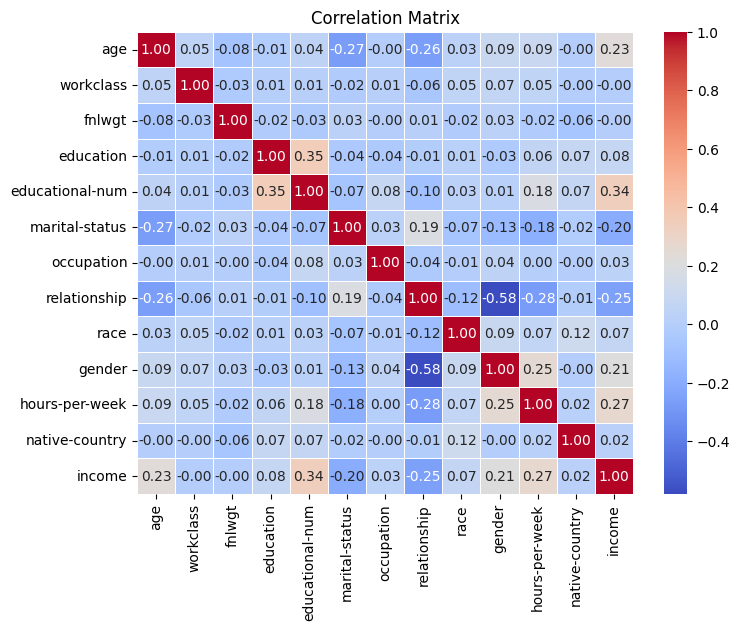

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



There is positive correlation between Educational-Num vs. Income

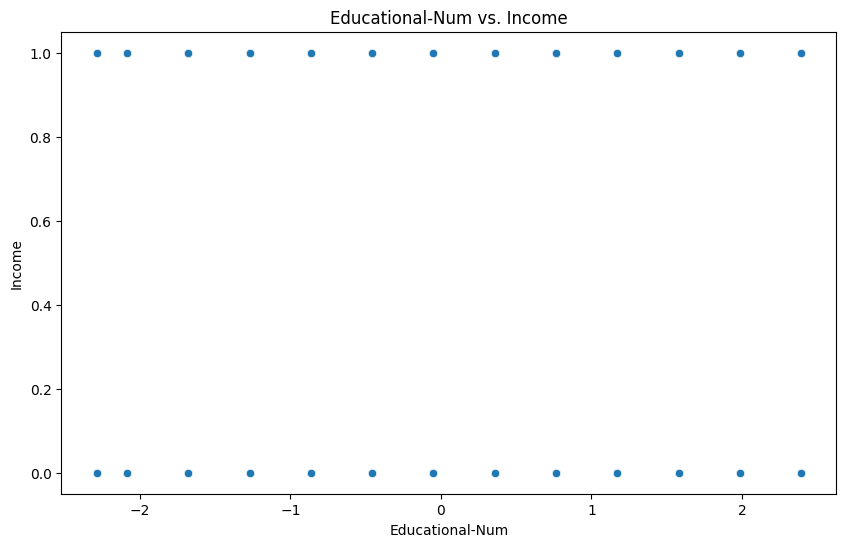

In [26]:
# Scatter plot of Educational-Num vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='educational-num', y='income', data=df)
plt.title('Educational-Num vs. Income')
plt.xlabel('Educational-Num')
plt.ylabel('Income')
plt.show()

# after i did this plot i found that Income affected by Educational-Num

There is correlation between Hours-Per-Week vs. Income



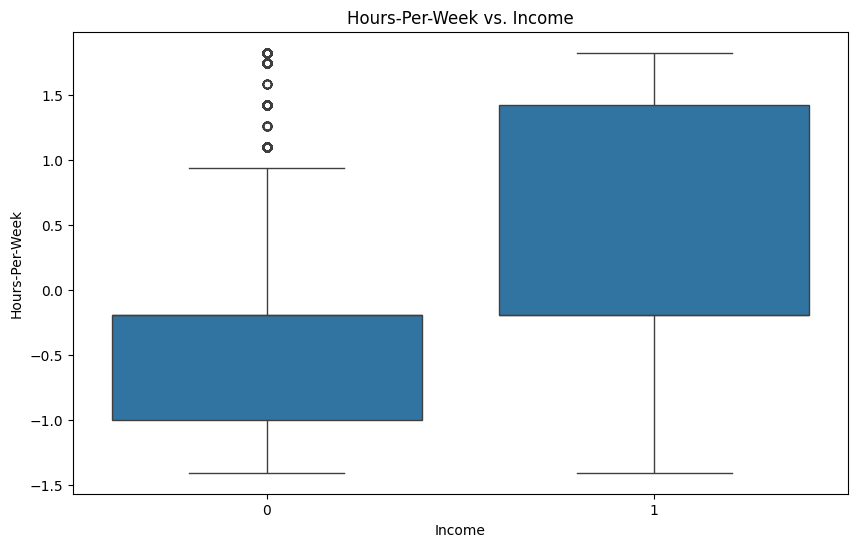

In [27]:

# Box plot of Hours-Per-Week vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours-Per-Week vs. Income')
plt.xlabel('Income')
plt.ylabel('Hours-Per-Week')
plt.show()


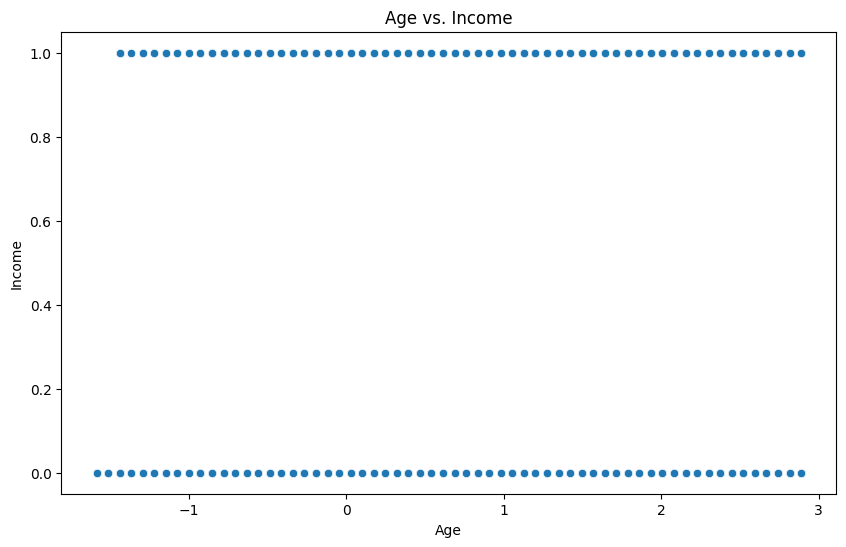

In [28]:
# Scatter plot of Age vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=df)
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()